In [ ]:
import os
import glob
import time
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from tensorflow import keras
import tensorflow as tf

In [ ]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8 MB 38 kB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.8 MB 52.9 MB/s 
     |████████████████████████████████| 449 kB 55.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=1e369245f649aab15d29bfa7573d28b11c19211fd2e9258a846010dc2ed393a3
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 186 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.data.external import untar_data, URLs
coco_path = untar_data(URLs.COCO_SAMPLE)
coco_path = str(coco_path) + "/train_sample"

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
path = coco_path
paths = glob.glob(path + "/*.jpg") 
np.random.seed(125)
paths_subset = np.random.choice(paths, 10000, replace=False) 
rand_idxs = np.random.permutation(10000)
train_idxs = rand_idxs[:8000] 
val_idxs = rand_idxs[8000:] 
train_paths = paths_subset[train_idxs]
val_paths = paths_subset[val_idxs]
print(len(train_idxs), len(val_idxs))

8000 2000


In [ ]:
coco_path

'/root/.fastai/data/coco_sample/train_sample'

In [ ]:
train_paths

array(['/root/.fastai/data/coco_sample/train_sample/000000131352.jpg',
       '/root/.fastai/data/coco_sample/train_sample/000000570115.jpg',
       '/root/.fastai/data/coco_sample/train_sample/000000116353.jpg',
       ...,
       '/root/.fastai/data/coco_sample/train_sample/000000502300.jpg',
       '/root/.fastai/data/coco_sample/train_sample/000000298459.jpg',
       '/root/.fastai/data/coco_sample/train_sample/000000571562.jpg'],
      dtype='<U60')

In [ ]:
import cv2
X_data = []
for myFile in train_paths:
    print(myFile)
    image = cv2.imread (myFile)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    X_data.append (res)

print('X_data shape:', np.array(X_data).shape)

Streaming output truncated to the last 5000 lines.
/root/.fastai/data/coco_sample/train_sample/000000178436.jpg
/root/.fastai/data/coco_sample/train_sample/000000398271.jpg
/root/.fastai/data/coco_sample/train_sample/000000196981.jpg
/root/.fastai/data/coco_sample/train_sample/000000208055.jpg
/root/.fastai/data/coco_sample/train_sample/000000518198.jpg
/root/.fastai/data/coco_sample/train_sample/000000418684.jpg
/root/.fastai/data/coco_sample/train_sample/000000224958.jpg
/root/.fastai/data/coco_sample/train_sample/000000059571.jpg
/root/.fastai/data/coco_sample/train_sample/000000067631.jpg
/root/.fastai/data/coco_sample/train_sample/000000324837.jpg
/root/.fastai/data/coco_sample/train_sample/000000407259.jpg
/root/.fastai/data/coco_sample/train_sample/000000254800.jpg
/root/.fastai/data/coco_sample/train_sample/000000427384.jpg
/root/.fastai/data/coco_sample/train_sample/000000382307.jpg
/root/.fastai/data/coco_sample/train_sample/000000504911.jpg
/root/.fastai/data/coco_sample/tra

In [ ]:
np.array(X_data).shape

(8000, 256, 256, 3)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

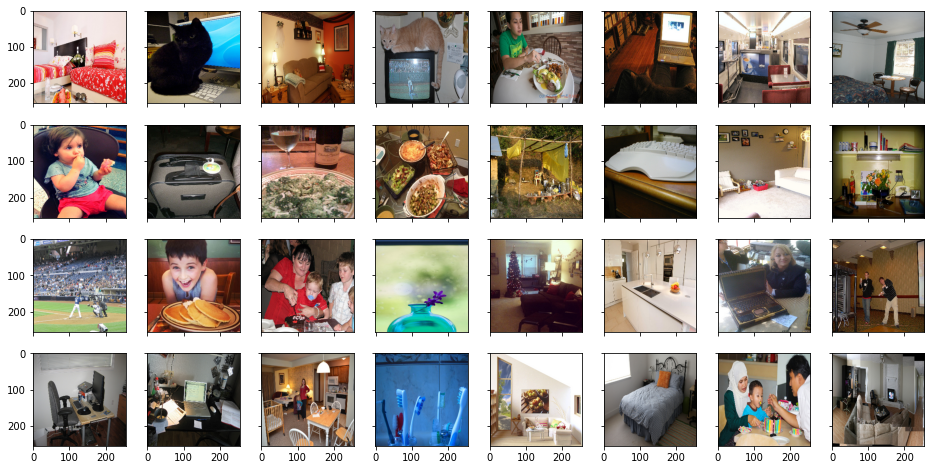

In [ ]:
sample_images = X_data[:32]

fig = plt.figure(figsize=(16., 8.))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 8),  
                 axes_pad=0.3,  
                 )

for ax, image in zip(grid, sample_images):
  ax.imshow(image)

plt.show()

In [ ]:
X_test = []
for myFile in val_paths:
    print(myFile)
    image = cv2.imread (myFile)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    res = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    X_test.append (res)

print('X_test shape:', np.array(X_test).shape)

/root/.fastai/data/coco_sample/train_sample/000000238928.jpg
/root/.fastai/data/coco_sample/train_sample/000000108987.jpg
/root/.fastai/data/coco_sample/train_sample/000000258017.jpg
/root/.fastai/data/coco_sample/train_sample/000000525572.jpg
/root/.fastai/data/coco_sample/train_sample/000000293537.jpg
/root/.fastai/data/coco_sample/train_sample/000000161218.jpg
/root/.fastai/data/coco_sample/train_sample/000000130081.jpg
/root/.fastai/data/coco_sample/train_sample/000000295630.jpg
/root/.fastai/data/coco_sample/train_sample/000000532351.jpg
/root/.fastai/data/coco_sample/train_sample/000000087456.jpg
/root/.fastai/data/coco_sample/train_sample/000000376505.jpg
/root/.fastai/data/coco_sample/train_sample/000000055363.jpg
/root/.fastai/data/coco_sample/train_sample/000000007762.jpg
/root/.fastai/data/coco_sample/train_sample/000000013061.jpg
/root/.fastai/data/coco_sample/train_sample/000000432727.jpg
/root/.fastai/data/coco_sample/train_sample/000000427518.jpg
/root/.fastai/data/coco_

In [ ]:
class createAugment(keras.utils.Sequence):
  def __init__(self, X, y, batch_size=8, dim=(256, 256), n_channels=3, shuffle=True):
      self.batch_size = batch_size 
      self.X = X 
      self.y = y
      self.dim = dim
      self.n_channels = n_channels
      self.shuffle = shuffle
      self.on_epoch_end()

  def __len__(self):
      return int(np.floor(len(self.X) / self.batch_size))

  def __getitem__(self, index):
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
      X_inputs, y_output = self.__data_generation(indexes)
      return X_inputs, y_output

  def on_epoch_end(self):
      self.indexes = np.arange(len(self.X))
      if self.shuffle:
          np.random.shuffle(self.indexes)

  def __data_generation(self, idxs):
    
    Masked_images = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Masked image
    Mask_batch = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) 
    y_batch = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels)) # Original image
    

  
    for i, idx in enumerate(idxs):
      image_copy = self.X[idx].copy()
      masked_image, mask = self.__createMask(image_copy)
      Masked_images[i,] = masked_image/255
      Mask_batch[i,] = mask/255
      y_batch[i] = self.y[idx]/255

    
    return [Masked_images, Mask_batch], y_batch

  def __createMask(self, img):
  
    mask = np.full((256,256,3), 255, np.uint8) 
    for _ in range(np.random.randint(1, 10)):
      x1, x2 = np.random.randint(1, 256), np.random.randint(1, 256)    
      y1, y2 = np.random.randint(1, 256), np.random.randint(1, 256)     
      thickness = np.random.randint(1, 3)    
      cv2.line(mask,(x1,y1),(x2,y2),(0,0,0),thickness)

    masked_image = img.copy()
    masked_image[mask==0] = 255

    return masked_image, mask

In [ ]:
traingen = createAugment(X_data,X_data)
testgen=createAugment(X_test,X_test)

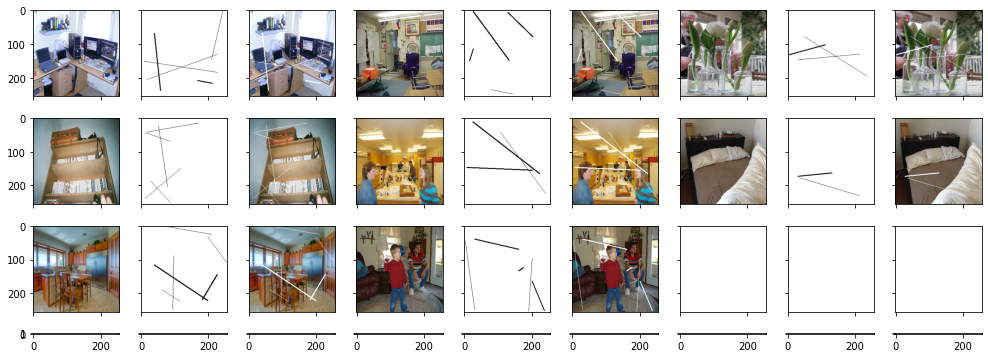

In [ ]:
sample_idx = 90 

[masked_images, masks], sample_labels = traingen[sample_idx]
sample_images = [None]*(len(masked_images)+len(masks)+len(sample_labels))
sample_images[::3] = sample_labels
sample_images[1::3] = masks
sample_images[2::3] = masked_images

fig = plt.figure(figsize=(17., 8.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(4, 9), 
                 axes_pad=0.3, 
                 )

for ax, image in zip(grid, sample_images):
  ax.imshow(image)

plt.show()


In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.backend.flatten(y_true)
    y_pred_f = keras.backend.flatten(y_pred)
    intersection = keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Activation, BatchNormalization
from tensorflow.keras.models import Model
from pconv_layer import PConv2D

def build_pconv_model(input_shape=(256, 256, 3)):
    input_image = Input(input_shape)
    input_mask = Input(input_shape, name='encoder_input')

    conv1, mask1, conv2, mask2 = encoder_layer(32, input_image, input_mask, ['conv1', 'conv2'])
    conv3, mask3, conv4, mask4 = encoder_layer(64, conv2, mask2, ['conv3', 'conv4'])
    conv5, mask5, conv6, mask6 = encoder_layer(128, conv4, mask4, ['conv5', 'conv6'])
    conv7, mask7, conv8, mask8 = encoder_layer(256, conv6, mask6, ['conv7', 'conv8'])
    conv9, mask9, conv10, mask10 = encoder_layer(512, conv8, mask8, ['conv9', 'encoder_output'])

    conv11, mask11, conv12, mask12 = decoder_layer(512, 256, conv10, mask10, conv9, mask9, ['conv11', 'conv12'])
    conv13, mask13, conv14, mask14 = decoder_layer(256, 128, conv12, mask12, conv7, mask7, ['conv13', 'conv14'])
    conv15, mask15, conv16, mask16 = decoder_layer(128, 64, conv14, mask14, conv5, mask5, ['conv15', 'conv16'])
    conv17, mask17, conv18, mask18 = decoder_layer(64, 32, conv16, mask16, conv3, mask3, ['conv17', 'conv18'])
    conv19, mask19, conv20, mask20 = decoder_layer(32, 3, conv18, mask18, conv1, mask1, ['conv19', 'decoder_output'])

    outputs = Conv2D(3, (3, 3), activation='leaky_relu', padding='same')(conv20)

    return Model(inputs=[input_image, input_mask], outputs=[outputs])


def encoder_layer(filters, in_layer, in_mask, names):
    conv1, mask1 = PConv2D(32, (3,3), strides=1, padding='same', name=names[0])([in_layer, in_mask])
    conv1 = Activation('relu')(conv1)

    conv2, mask2 = PConv2D(32, (3,3), strides=2, padding='same', name=names[1])([conv1, mask1])
    
    conv2 = Activation('relu')(conv2)

    return conv1, mask1, conv2, mask2

def decoder_layer(filter1, filter2, in_img, in_mask, share_img, share_mask, names):
    up_img = UpSampling2D(size=(2,2))(in_img)
    up_mask = UpSampling2D(size=(2,2))(in_mask)
    concat_img = Concatenate(axis=3)([share_img, up_img])
    concat_mask = Concatenate(axis=3)([share_mask, up_mask])

    conv1, mask1 = PConv2D(filter1, (3,3), padding='same', name=names[0])([concat_img, concat_mask])
    conv1 = Activation('relu')(conv1)

    conv2, mask2 = PConv2D(filter2, (3,3), padding='same', name=names[1])([conv1, mask1])
    
    conv2 = Activation('relu')(conv2)

    return conv1, mask1, conv2,mask2


In [ ]:
Model = build_pconv_model()
Model.compile(optimizer='adam', loss='mean_absolute_error', metrics='accuracy')
Model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encoder_input (InputLayer)      [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1 (PConv2D)                 [(None, 256, 256, 32 1760        input_1[0][0]                    
                                                                 encoder_input[0][0]              
__________________________________________________________________________________________________
tf.nn.relu (TFOpLambda)         (None, 256, 256, 32) 0           conv1[0][0]                  

In [ ]:
import tensorflow as tf
import gc

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        

Model.fit(traingen, validation_data=testgen, 
          epochs=5, 
          batch_size=32,steps_per_epoch=250)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 693s 657ms/step - loss: 0.1107 - dice_coef: 0.5291 - val_loss: 0.0742 - val_dice_coef: 0.5652
Epoch 2/5
1000/1000 [==============================] - 658s 658ms/step - loss: 0.0705 - dice_coef: 0.5701 - val_loss: 0.0681 - val_dice_coef: 0.5667
Epoch 3/5
1000/1000 [==============================] - 658s 658ms/step - loss: 0.0673 - dice_coef: 0.5725 - val_loss: 0.0659 - val_dice_coef: 0.5745
Epoch 4/5
1000/1000 [==============================] - 659s 659ms/step - loss: 0.0603 - dice_coef: 0.5761 - val_loss: 0.0456 - val_dice_coef: 0.5768
Epoch 5/5
1000/1000 [==============================] - 659s 659ms/step - loss: 0.0422 - dice_coef: 0.5852 - val_loss: 0.0407 - val_dice_coef: 0.5838


In [ ]:
model.save('my_model.h5')

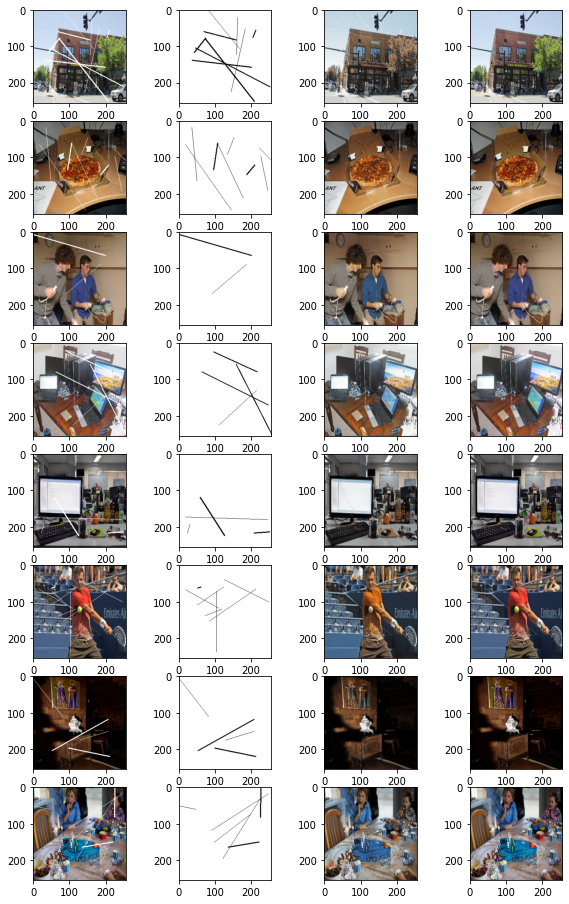

In [ ]:
rows = 8
sample_idx = 1
[masked_images, masks], sample_labels = testgen[sample_idx]

fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(10, 2*rows))

for i in range(rows):
  inputs = [masked_images[i].reshape((1,)+masked_images[i].shape), masks[i].reshape((1,)+masks[i].shape)]
  impainted_image = model.predict(inputs)
  axs[i][0].imshow(masked_images[i])
  axs[i][1].imshow(masks[i])
  axs[i][2].imshow(impainted_image.reshape(impainted_image.shape[1:]))
  axs[i][3].imshow(sample_labels[i])
  
plt.show()